# Histograms of album features, top and bottom 30%, sorted by 'rating' and 'popularity'

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import MinMaxScaler


plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
tracks = pd.read_csv("tracks.csv", index_col="trackid")
print(len(tracks))

albums = pd.read_csv("albums.csv", index_col="albumid", encoding='cp1252')
print(len(albums))

3899
332


In [3]:
tracks.head()

,albumid,name,danceability,energy,key,valence,mode,tempo,speechiness,loudness,instrumentalness,acousticness,time_signature,liveness,sent,sent_magn
trackid,,,,,,,,,,,,,,,,
5WY9CIYqHDr2eLc3q1V2Z7,7HoqZkuUQEE12tl0ByOSsh,"""Graveyard""",0.705196,0.333668,0.818182,0.499492,1.0,0.469445,0.038002,0.566397,0.881339,0.000000,0.8,0.053279,NaN,NaN
3Z3Ul44K0thTMfLAlt8tc9,1yBoaVrgcup2hX2DCYUajs,"""Croker Courtbullion""",0.289502,0.414070,0.000000,0.644670,0.0,0.378028,0.067318,0.519480,0.002028,0.182915,0.6,0.063525,NaN,NaN
3q3gK9I4mj03565IGtVA0d,5z090LQztiqh13wYspQvKQ,"""Moon, Turn The Tides... Gently, Gently Away""",0.000000,0.389950,0.545455,0.000000,1.0,0.000000,0.000000,0.411299,0.945233,0.406030,0.0,0.040984,NaN,NaN
3g5LhwtHomXoYYf3oEUMvM,1yBoaVrgcup2hX2DCYUajs,"""Danse Kalinda Ba Doom""",0.486744,0.576884,0.636364,0.914721,1.0,0.362787,0.041260,0.542188,0.001014,0.848241,0.8,0.053279,NaN,NaN
6bDKcfWj4bUDSOVN5IBJH7,0L8n5dW0KfoNnLuYfyOFPg,"""Nasal Retentive Caliope Music""",0.498409,0.907538,0.090909,0.032487,1.0,0.556676,0.542888,0.582505,0.151116,0.529648,0.8,0.355533,NaN,NaN


In [4]:
albums.head()

,Year,Album,Artist,Genre,Subgenre,rating,popularity,danceability_mean,danceability_std,energy_mean,...,acousticness_mean,acousticness_std,liveness_mean,liveness_std,key_mean,key_std,time_signature_mean,time_signature_std,sent_magn_mean,sent_magn_std
albumid,,,,,,,,,,,,,,,,,,,,,
6b7ycwe2rxq6FkaupNuGoS,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",0.920000,0.721519,0.484216,0.158600,0.615153,...,0.226749,0.263797,0.314313,0.294915,0.349650,0.312385,0.738462,1.709701e-01,0.008164,0.005136
6GphKx2QAPRoVGWE9D7ou8,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",0.902857,0.873418,0.457052,0.170927,0.561809,...,0.382296,0.242559,0.112547,0.052289,0.594406,0.314076,0.769231,7.510676e-02,0.005325,0.003539
3PRoXYsngSwjEQWR5PsHWR,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",0.925714,0.810127,0.511589,0.132062,0.530223,...,0.408184,0.353499,0.240266,0.208611,0.448052,0.290700,0.785714,5.345225e-02,0.007054,0.003247
6YabPKtZAjxwyWbuO9p4ZD,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",0.902857,0.822785,0.474608,0.078279,0.668900,...,0.668677,0.133462,0.241689,0.128753,0.515152,0.433609,0.800000,1.177569e-16,0.010606,0.007970
50o7kf2wLwVmOTVYJOTplm,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,0.891429,0.835443,0.623315,0.100623,0.539052,...,0.151543,0.234265,0.084895,0.064585,0.389610,0.286213,0.785714,5.345225e-02,0.008498,0.004127


In [5]:
albums.columns

Index(['Year', 'Album', 'Artist', 'Genre', 'Subgenre', 'rating', 'popularity',
       'danceability_mean', 'danceability_std', 'energy_mean', 'energy_std',
       'tempo_mean', 'tempo_std', 'valence_mean', 'valence_std', 'sent_mean',
       'sent_std', 'mode_mean', 'mode_std', 'speechiness_mean',
       'speechiness_std', 'loudness_mean', 'loudness_std',
       'instrumentalness_mean', 'instrumentalness_std', 'acousticness_mean',
       'acousticness_std', 'liveness_mean', 'liveness_std', 'key_mean',
       'key_std', 'time_signature_mean', 'time_signature_std',
       'sent_magn_mean', 'sent_magn_std'],
      dtype='object')

In [6]:
len(['danceability_mean', 'danceability_std', 'energy_mean', 'energy_std',
       'tempo_mean', 'tempo_std', 'valence_mean', 'valence_std', 'sent_mean',
       'sent_std', 'mode_mean', 'mode_std', 'speechiness_mean',
       'speechiness_std', 'loudness_mean', 'loudness_std',
       'instrumentalness_mean', 'instrumentalness_std', 'acousticness_mean',
       'acousticness_std', 'liveness_mean', 'liveness_std'])

22

## Columns to be considered 

In [7]:
columns = ["danceability", "energy", "tempo", "valence", "sent"]
props = ["_mean", "_std"]

## SORTED BY 'RATING'

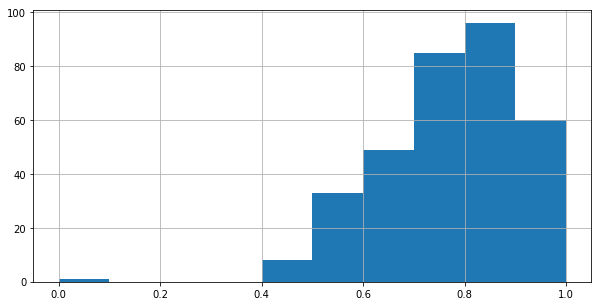

In [8]:
albums.rating.hist()

In [9]:
columns_hist_limits = {
    
}
for col in columns:
    for prop in props:
        columns_hist_limits[col+prop] = {}
        columns_hist_limits[col+prop]['x_min'] = None
        columns_hist_limits[col+prop]['x_max'] = None
        columns_hist_limits[col+prop]['y_min'] = None
        columns_hist_limits[col+prop]['y_max'] = None

perc_axis_limit = 10/100
albums_count = len(albums)
top_count = int(len(albums) / 10) * 3
bottom_count = int(len(albums) / 10) * 3

# rating
albums_sorted_rating = albums.sort_values(by="rating")
top_percent_rating = albums_sorted_rating.head(top_count)
bottom_percent_rating = albums_sorted_rating.tail(bottom_count)

# popularity
albums_sorted_popularity = albums.sort_values(by="popularity")
top_percent_popularity = albums_sorted_popularity.head(top_count)
bottom_percent_popularity = albums_sorted_popularity.tail(bottom_count)

In [10]:
for col in columns:
    for prop in props:
        for dataset in [top_percent_rating, top_percent_popularity, bottom_percent_rating, bottom_percent_popularity]:
            count, division = np.histogram(dataset[col+prop], bins=10)
            y_min = count.min()
            y_max = count.max()
            x_min = division.min()
            x_max = division.max()
            
            if columns_hist_limits[col+prop]['x_max'] == None or  columns_hist_limits[col+prop]['x_max'] < x_max:
                columns_hist_limits[col+prop]['x_max'] = x_max
                
            if columns_hist_limits[col+prop]['x_min'] == None or  columns_hist_limits[col+prop]['x_min'] > x_min:
                columns_hist_limits[col+prop]['x_min'] = x_min
                
            if columns_hist_limits[col+prop]['y_max'] == None or  columns_hist_limits[col+prop]['y_max'] < y_max:
                columns_hist_limits[col+prop]['y_max'] = y_max
                
            if columns_hist_limits[col+prop]['y_min'] == None or  columns_hist_limits[col+prop]['y_min'] > y_min:
                columns_hist_limits[col+prop]['y_min'] = y_min

### TOP for 'rating'

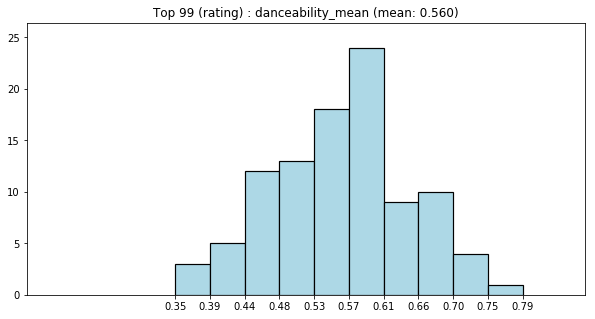

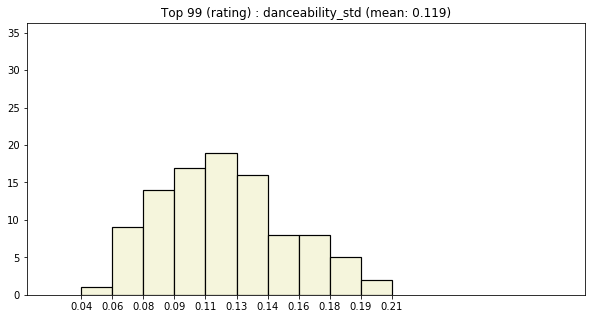

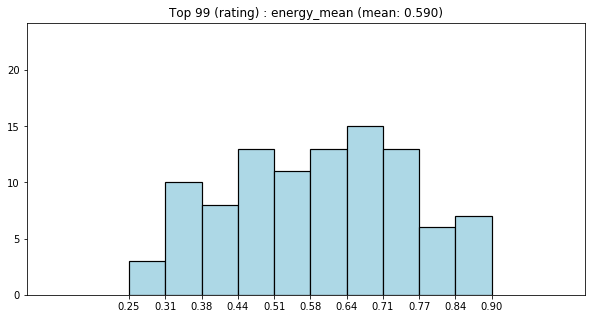

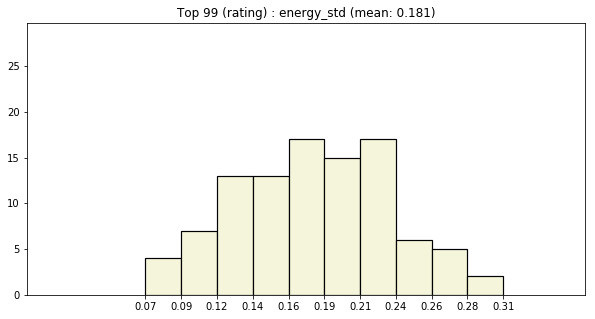

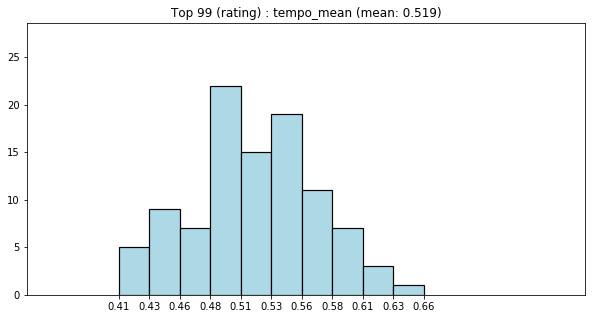

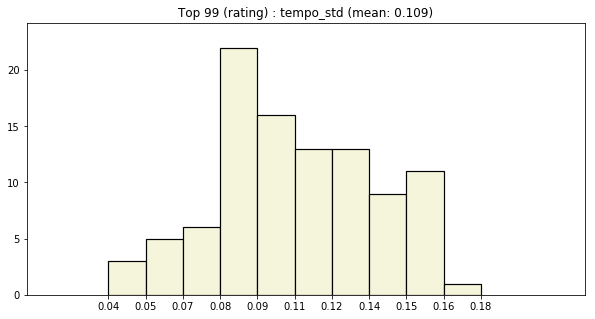

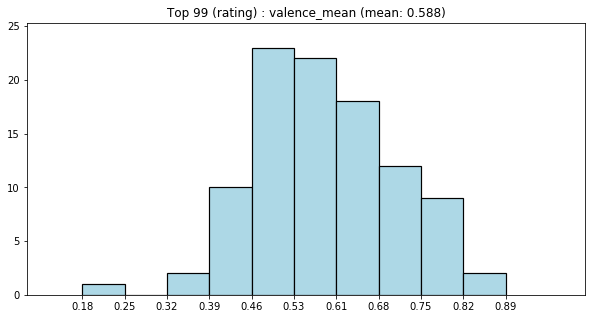

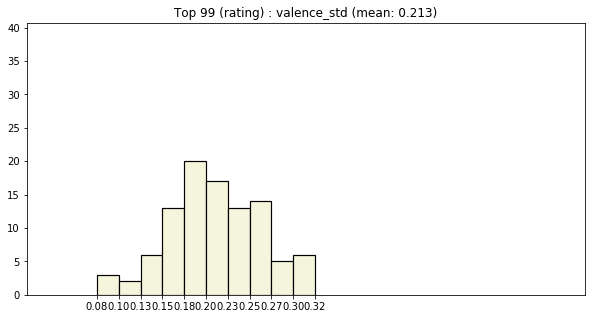

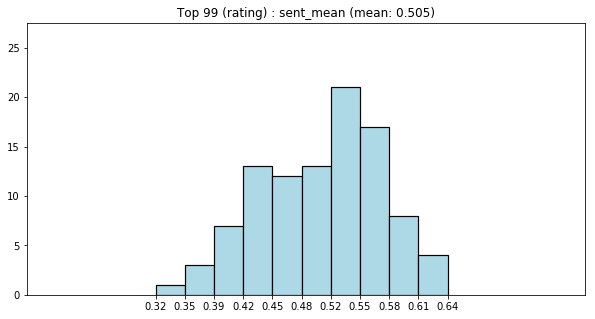

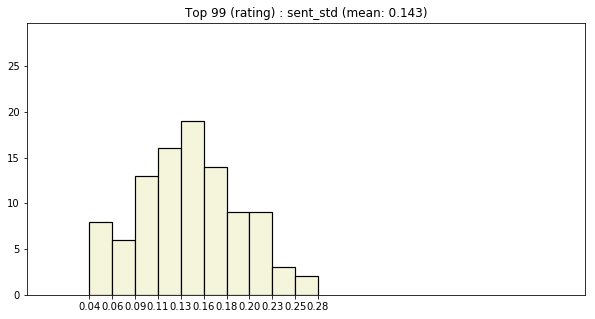

In [11]:
for col in columns:
    for prop in props:
        count, division = np.histogram(top_percent_rating[col+prop], bins=10)

        plt.figure()
        if prop == "_mean":
            plt.hist(top_percent_rating[col+prop], color='lightblue', edgecolor='black', linewidth=1.2)
        elif prop == "_std":
            plt.hist(top_percent_rating[col+prop], color='beige', edgecolor='black', linewidth=1.2)
            
        mean_global = top_percent_rating[col+prop].mean()    
        plt.title("Top " + str(len(top_percent_rating)) + " (rating) : " + col + prop + " (mean: %.3f)" %mean_global)
        
        if col+prop not in ["sent_magn_mean"]:
            x_max = columns_hist_limits[col+prop]['x_max']
            x_min = columns_hist_limits[col+prop]['x_min']
            y_max = columns_hist_limits[col+prop]['y_max']
            y_min = columns_hist_limits[col+prop]['y_min']        
            plt.xlim(x_min - perc_axis_limit*x_max, x_max + perc_axis_limit*x_max)
            plt.ylim(0, y_max + perc_axis_limit*y_max)
        
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        plt.xticks(division)
        
        filename = "rating-top-%s" % (col+prop)
        filename = filename.replace("_", "-")
        plt.gcf().savefig(filename)

### BOTTOM for 'rating'

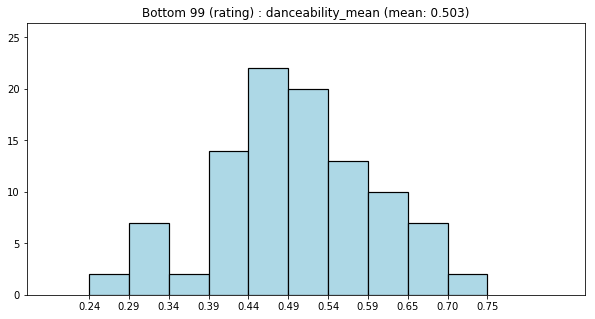

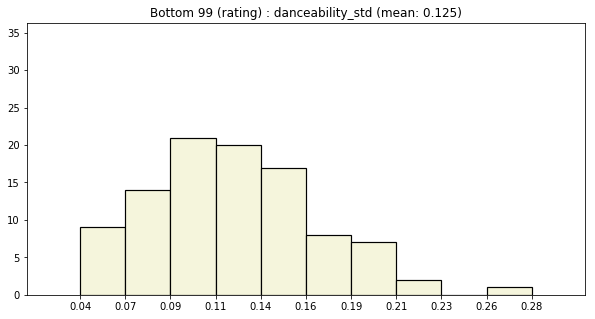

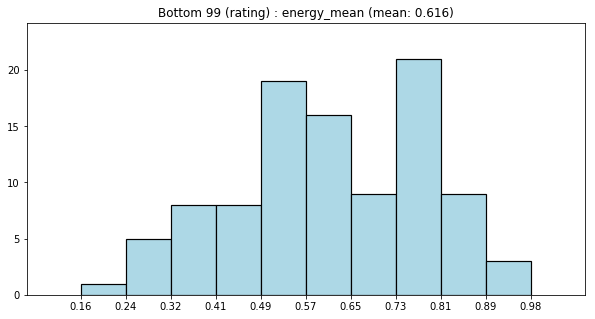

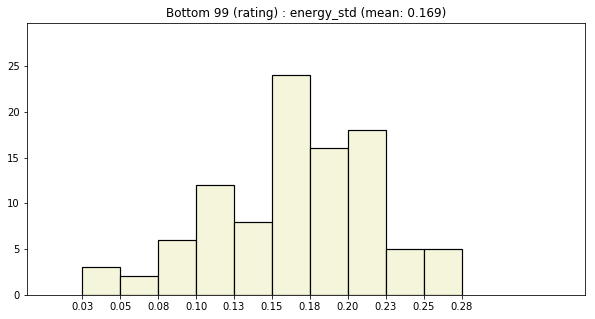

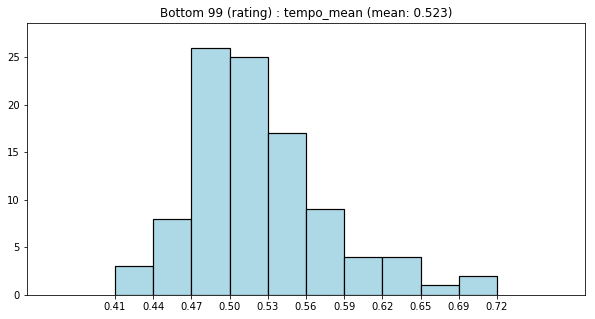

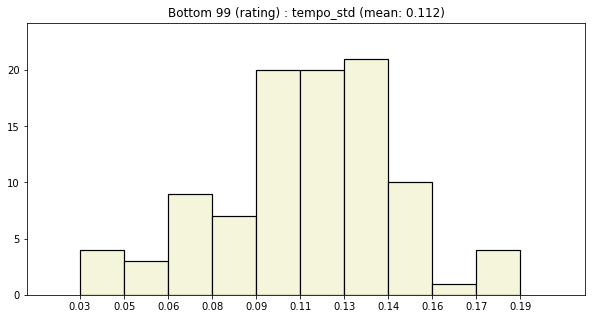

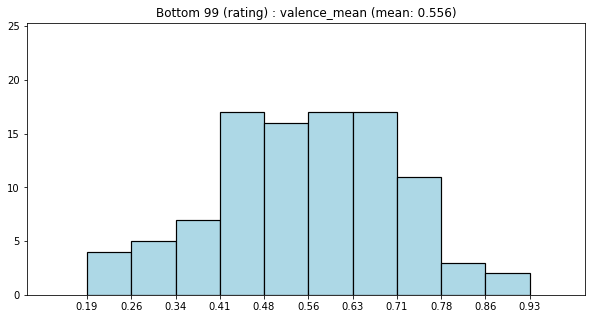

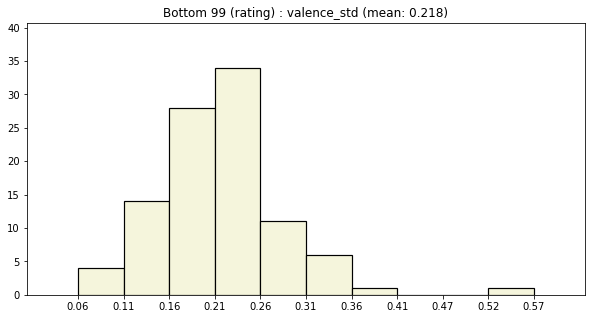

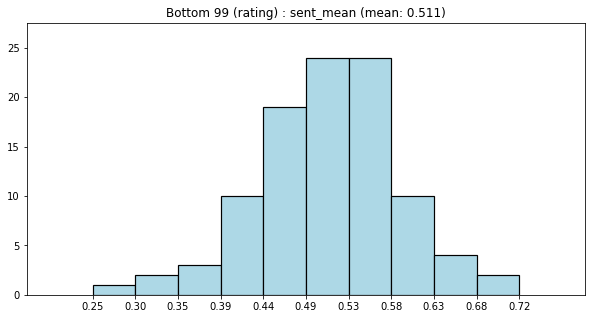

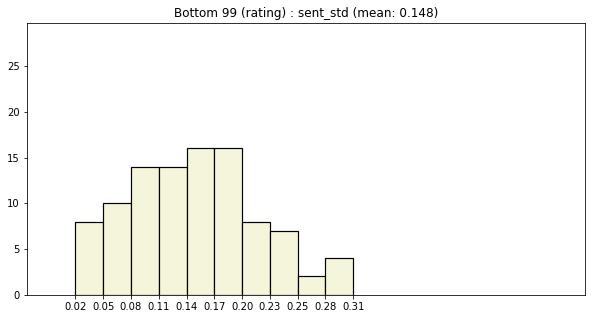

In [12]:
for col in columns:
    for prop in props:        
        count, division = np.histogram(bottom_percent_rating[col+prop], bins=10)

        
        plt.figure()
        if prop == "_mean":
            plt.hist(bottom_percent_rating[col+prop], color='lightblue', edgecolor='black', linewidth=1.2)
        elif prop == "_std":
            plt.hist(bottom_percent_rating[col+prop], color='beige', edgecolor='black', linewidth=1.2)
            
        mean_global = bottom_percent_rating[col+prop].mean()    
        plt.title("Bottom " + str(len(bottom_percent_rating)) + " (rating) : " + col + prop + " (mean: %.3f)" %mean_global)
        
        if col+prop not in ["sent_magn_mean"]:
            x_max = columns_hist_limits[col+prop]['x_max']
            x_min = columns_hist_limits[col+prop]['x_min']
            y_max = columns_hist_limits[col+prop]['y_max']
            y_min = columns_hist_limits[col+prop]['y_min']        
            plt.xlim(x_min - perc_axis_limit*x_max, x_max + perc_axis_limit*x_max)
            plt.ylim(0, y_max + perc_axis_limit*y_max)
        
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        plt.xticks(division)
        
        filename = "rating-bottom-%s" % (col+prop)
        filename = filename.replace("_", "-")
        plt.gcf().savefig(filename)

## USE 'POPULARITY' INSTEAD OF RATING

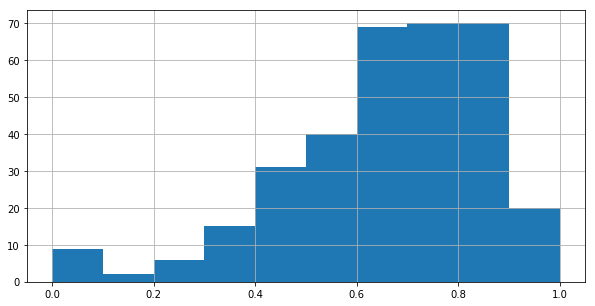

In [13]:
albums.popularity.hist()

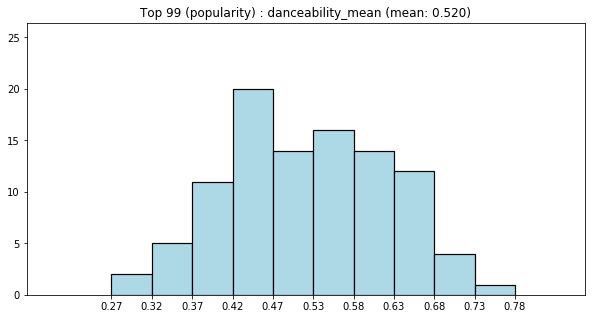

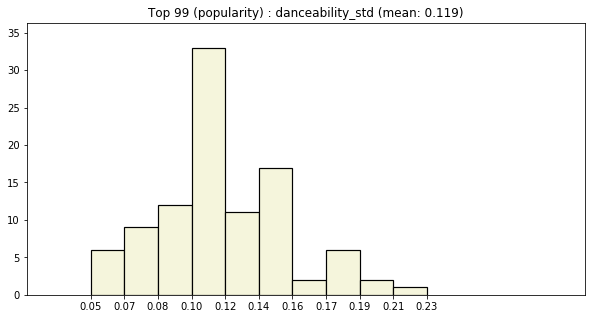

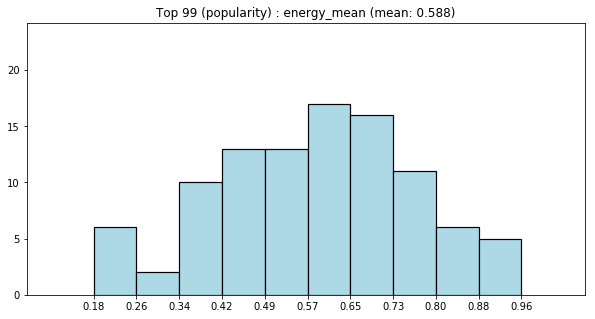

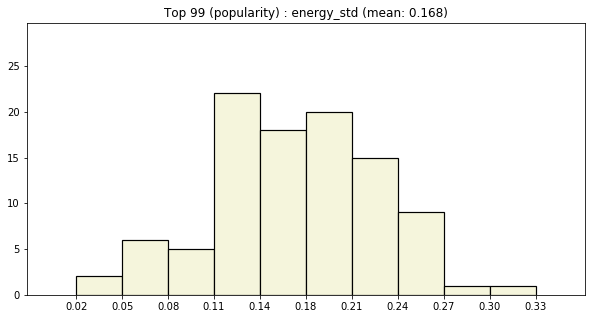

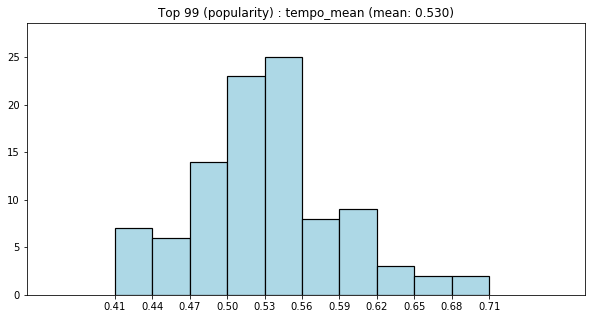

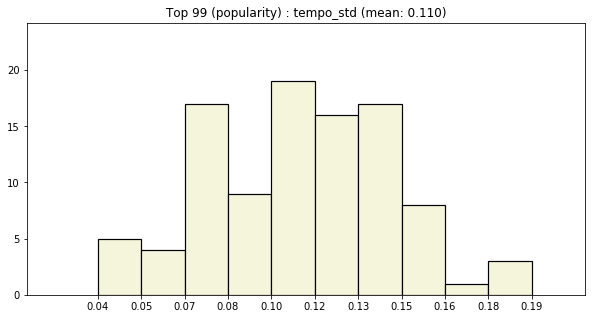

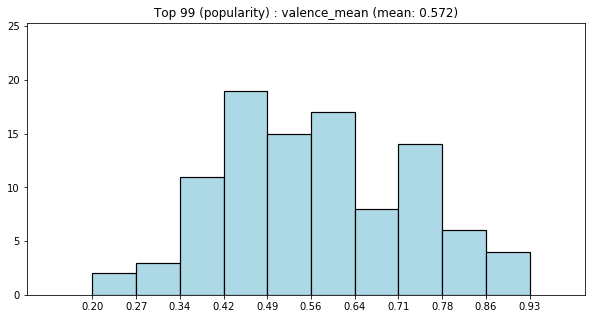

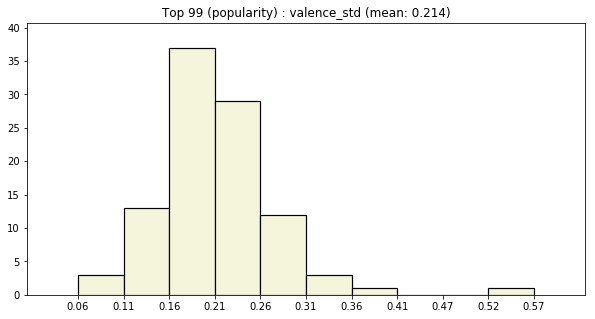

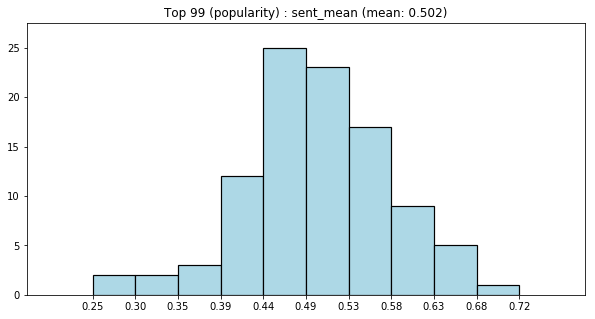

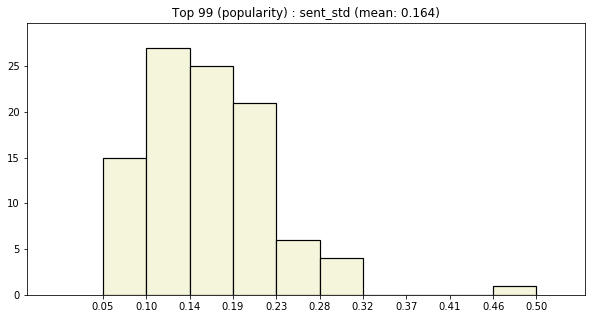

In [14]:
for col in columns:
    for prop in props:
        x_max = columns_hist_limits[col+prop]['x_max']
        x_min = columns_hist_limits[col+prop]['x_min']
        y_max = columns_hist_limits[col+prop]['y_max']
        y_min = columns_hist_limits[col+prop]['y_min']
        
        count, division = np.histogram(top_percent_popularity[col+prop], bins=10)
        
        mean_global = top_percent_popularity[col+prop].mean()    
            
        plt.figure()
        if prop == "_mean":
            plt.hist(top_percent_popularity[col+prop], color='lightblue', edgecolor='black', linewidth=1.2)
        elif prop == "_std":
            plt.hist(top_percent_popularity[col+prop], color='beige', edgecolor='black', linewidth=1.2)
        plt.title("Top " + str(len(top_percent_popularity)) + " (popularity) : " + col + prop+ " (mean: %.3f)" %mean_global)    
        plt.xlim(x_min - perc_axis_limit*x_max, x_max + perc_axis_limit*x_max)
        plt.ylim(0, y_max + perc_axis_limit*y_max)
        
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
        plt.xticks(division)
        
        filename = "popularity-top-%s" % (col+prop)
        filename = filename.replace("_", "-")
        plt.gcf().savefig(filename)

### BOTTOM for 'popularity'

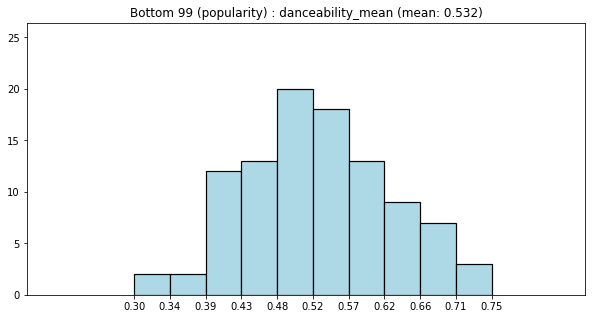

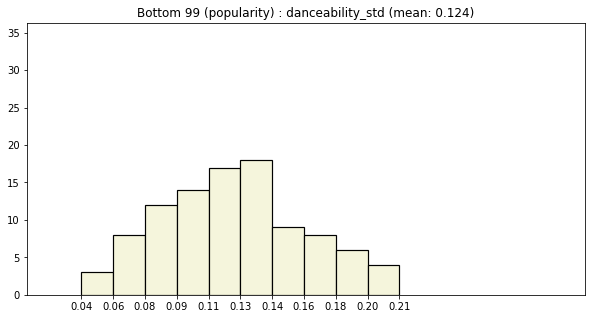

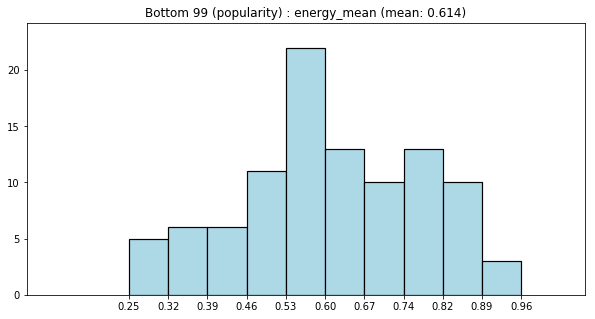

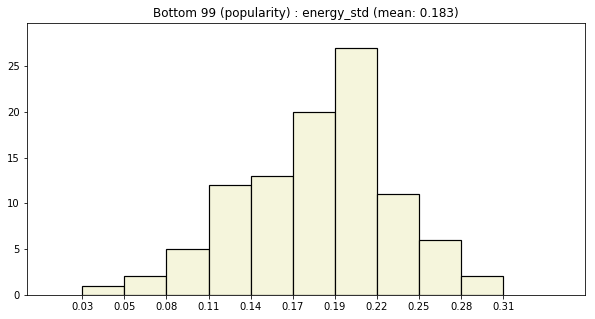

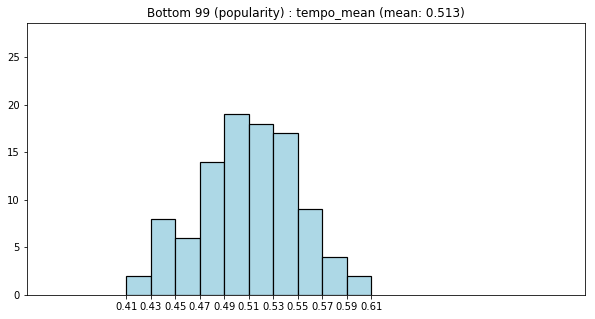

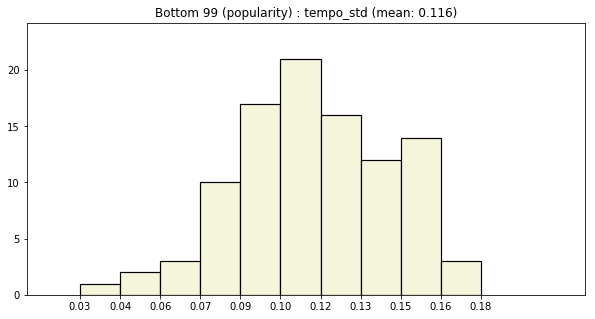

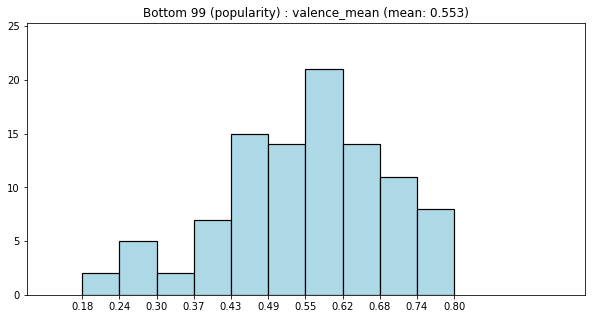

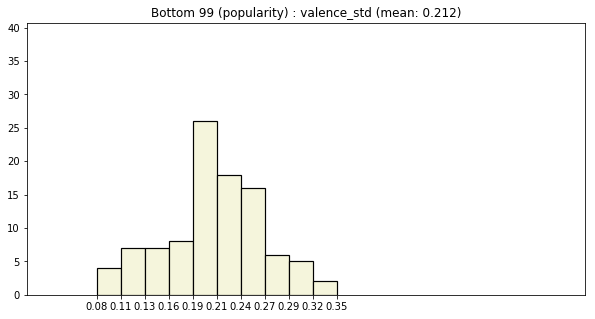

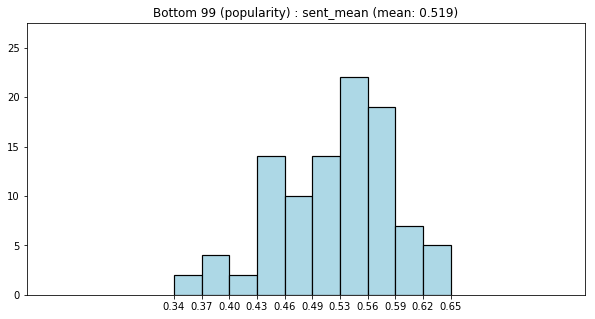

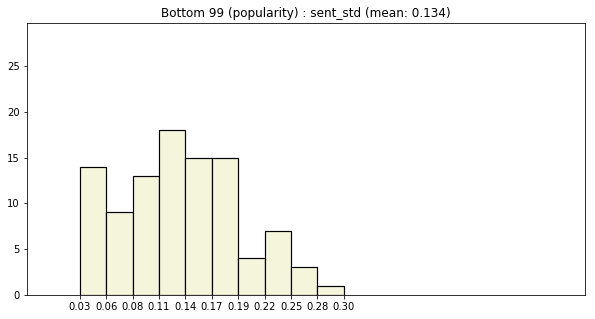

In [15]:
for col in columns:
    for prop in props:
        x_max = columns_hist_limits[col+prop]['x_max']
        x_min = columns_hist_limits[col+prop]['x_min']
        y_max = columns_hist_limits[col+prop]['y_max']
        y_min = columns_hist_limits[col+prop]['y_min']
        
        count, division = np.histogram(bottom_percent_popularity[col+prop], bins=10)        
        
        mean_global = bottom_percent_popularity[col+prop].mean()    
        
        plt.figure()
        
        plt.title("Bottom " + str(len(bottom_percent_popularity)) + " (popularity) : " + col + prop + " (mean: %.3f)" %mean_global)
        if prop == "_mean":
            plt.hist(bottom_percent_popularity[col+prop], color='lightblue', edgecolor='black', linewidth=1.2)
        elif prop == "_std":
            plt.hist(bottom_percent_popularity[col+prop], color='beige', edgecolor='black', linewidth=1.2)
        
        plt.xlim(x_min - perc_axis_limit*x_max, x_max + perc_axis_limit*x_max)
        plt.ylim(0, y_max + perc_axis_limit*y_max)
        
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
        plt.xticks(division)
        filename = "popularity-bottom-%s" % (col+prop)
        filename = filename.replace("_", "-")
        plt.gcf().savefig(filename)